<a href="https://colab.research.google.com/github/drashti178/CE091_ML_Labs/blob/main/ML_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, centers=3, n_features=2,cluster_std=0.2, random_state=4)

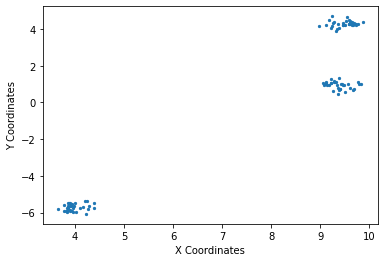

In [3]:
# Scatter plot of the data points
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, -1],s=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

In [4]:
 # Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=4).fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[ 9.4762884 ,  4.29114069],
       [ 3.98450259, -5.71326721],
       [ 9.37303505,  0.94682228]])

In [6]:
# Get the cluster labels
kmeans.labels_

array([0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1,
       2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0,
       1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

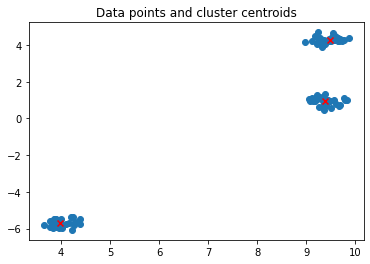

In [7]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [8]:
# Calculate silhouette_score
#means nearest-cluster distance for each sample
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.9173364619914911


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


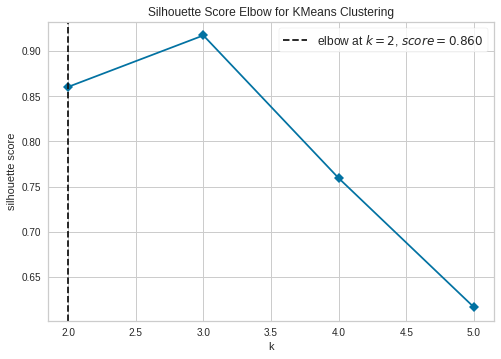

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [9]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=4)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)
# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


array([1], dtype=int32)

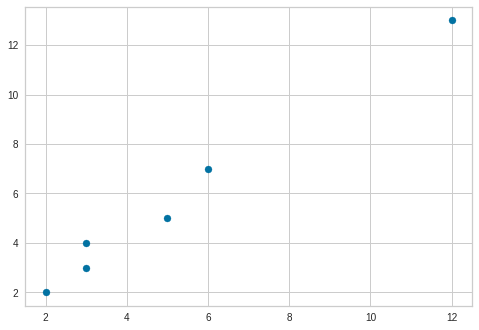

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
X1 = np.array([[2,2],[3,4],[6,7],[5,5],[3,3],[12,13]])
#X1.shape()
X2 = np.array([2,3,4])
plt.scatter(X1[:,0], X1[:,1])
centroid = np.array([[2,2],[3,4],[6,7]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
kmeans.cluster_centers_
kmeans.labels_
#print("Number of iterations " , kmeans.n_iter_)
kmeans.predict([[8,8]])

Hand Written Digit Recognition

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
digits = load_digits() #load the dataset in digits

In [15]:
digits.data.shape

(1797, 64)

In [13]:
digits.keys() #Dataset loaded is a dictionary
# data : flattened arrays/tensors used for clustering
# target : label associated with flattened array
#print(digits.target)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [14]:
digits.data[0:3] #flattened data for 3 images of the dataset

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [16]:
# km = KMeans(n_samples=1797,n_features=64,n_clusters=10, init='random',n_init=10,max_iter=300, tol=1e-04, random_state=0)
# y_km = km.fit_predict(digits.data[0:3])
X = digits.data

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(digits.data)
print(kmeans.labels_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[5 7 7 ... 7 3 3]


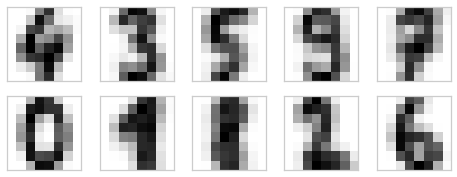

In [18]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of␣subplots( 2 rows and 5 columns)
centers = kmeans.cluster_centers_.reshape(10,8,8)
#flattened image can't be viewed, re-transform/reshape/inverse transform it to␣original form to view matrix shaped image
#reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8␣matrix
for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image &␣plotting relevant centers
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)
#imshow(matplotlib method) to render the image in notebook

In [19]:
clusters=digits.target
labels = np.zeros_like(clusters) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
  mask = (clusters == i)
#if a specific digit belongs to/equivalent a specific cluster then its True␣else False
  print(mask)
  labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[ True False False ... False False False]
[False  True False ... False False False]
[False False  True ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ...  True False  True]
[False False False ... False  True False]


<ipython-input-19-9dbf7b918b7a>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


4. Use the k-means algorithm in python to cluster the following 8 examples into 3 clusters: A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9). (a) Suppose that the centers of each cluster are A1, A4 and A7. Run the k-means algorithm for 3 epochs only. At the end of this epoch show:
i. The new clusters (i.e. the examples belonging to each cluster)(mention the appro- priate attribute used to identify the clusters in sklearn)

ii. The centers of the new clusters (mention the appropriate attribute used to identify the cluster centers in sklearn)

cluster center for 1st iteration:
 [[ 2.  10. ]
 [ 6.   6. ]
 [ 1.5  3.5]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


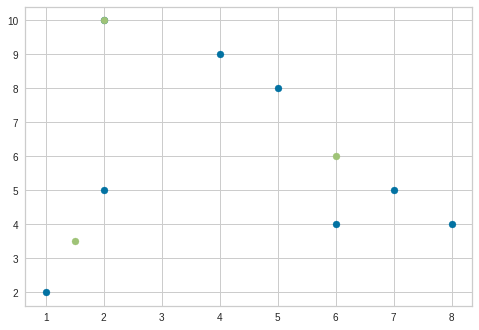

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
centroid = np.array([[2,10],[5,8],[1,2]])

kmeans = KMeans(n_clusters=3, init=centroid, max_iter=1).fit(X)
print("cluster center for 1st iteration:\n", kmeans.cluster_centers_)

c1 = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(c1[:,0], c1[:,1])


cluster center after 2nd iteration:
 [[3.   9.5 ]
 [6.5  5.25]
 [1.5  3.5 ]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


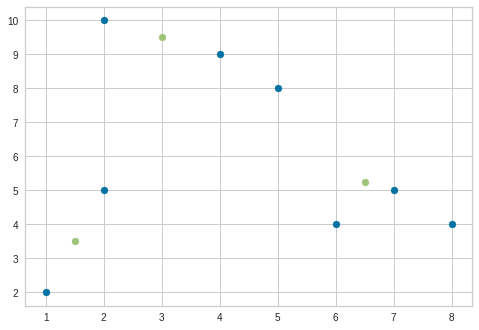

In [21]:
#2nd iteration
kmeans = KMeans(n_clusters=3, init=c1, max_iter=1).fit(X)
print("\ncluster center after 2nd iteration:\n", kmeans.cluster_centers_)

c2 = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(c2[:,0], c2[:,1])


cluster center after 3rd iteration:
 [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


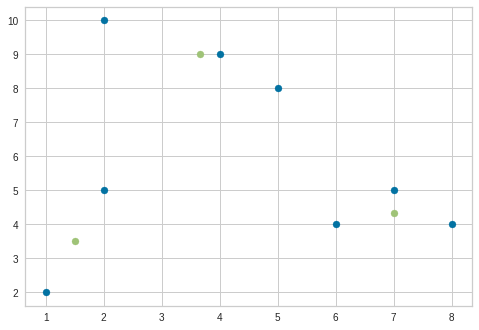

In [22]:
#3rd iteration
kmeans = KMeans(n_clusters=3, init=c2, max_iter=1).fit(X)
print("\ncluster center after 3rd iteration:\n", kmeans.cluster_centers_)

c3 = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(c3[:,0], c3[:,1])